Indice esercizi
---
- [1.1](#1.1)

1.1
===

In [1]:
import pandas as pd

df = pd.read_csv('../data/OPSD_Germany_all.csv',
                 parse_dates=True,
                 index_col='Date')
df.head()

,Consumption,Wind,Solar
Date,,,
2006-01-01,1069.184,NaN,NaN
2006-01-02,1380.521,NaN,NaN
2006-01-03,1442.533,NaN,NaN
2006-01-04,1457.217,NaN,NaN
2006-01-05,1477.131,NaN,NaN


In [2]:
df = df['2012':]

df.head()

,Consumption,Wind,Solar
Date,,,
2012-01-01,948.128,227.465,6.587
2012-01-02,1269.581,207.327,6.574
2012-01-03,1334.745,473.468,24.679
2012-01-04,1347.136,499.804,14.681
2012-01-05,1376.658,523.851,5.071


In [3]:
df['Renewable'] = df['Wind'] + df['Solar']

df.head()

,Consumption,Wind,Solar,Renewable
Date,,,,
2012-01-01,948.128,227.465,6.587,234.052
2012-01-02,1269.581,207.327,6.574,213.901
2012-01-03,1334.745,473.468,24.679,498.147
2012-01-04,1347.136,499.804,14.681,514.485
2012-01-05,1376.658,523.851,5.071,528.922


In [4]:
a = df['2014-09']['Renewable'].sum()
b = df.loc['2014-09', 'Consumption'].sum()#sintassi alternativa

print(f'A settembre 2014 il rapporto tra produzione rinnovabile e consumo è {a/b:.2f}')

A settembre 2014 il rapporto tra produzione rinnovabile e consumo è 0.13


In [9]:
df['Weekday'] = df.index.day_name()
df.head()

,Consumption,Wind,Solar,Renewable,Weekday
Date,,,,,
2012-01-01,948.128,227.465,6.587,234.052,Sunday
2012-01-02,1269.581,207.327,6.574,213.901,Monday
2012-01-03,1334.745,473.468,24.679,498.147,Tuesday
2012-01-04,1347.136,499.804,14.681,514.485,Wednesday
2012-01-05,1376.658,523.851,5.071,528.922,Thursday


In [10]:
df_sunday_wind = df[df['Weekday'] == 'Sunday']['Wind']

df_sunday_wind.head()

Date
2012-01-01    227.465
2012-01-08    220.851
2012-01-15     34.468
2012-01-22    418.173
2012-01-29     78.807
Name: Wind, dtype: float64

In [11]:
x = df_sunday_wind['2017-01':'2017-03'].mean()

print(f'Il consumo medio domenicale tra gennaio e marzo 2017 è {x:.2f}')

Il consumo medio domenicale tra gennaio e marzo 2017 è 276.96


1.2
===

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f30339c18>,
      dtype=object)

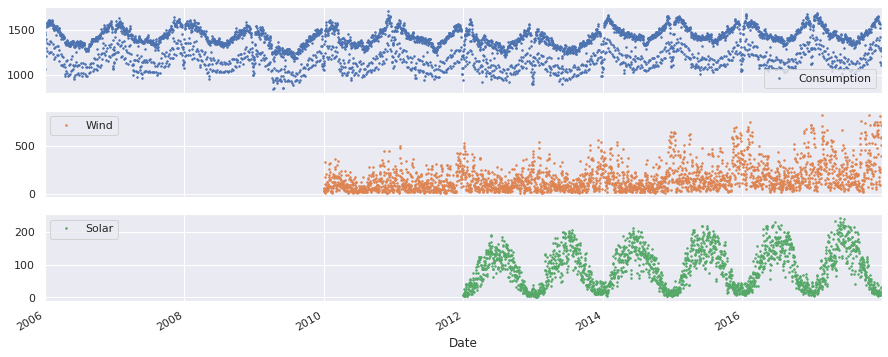

In [63]:
df.plot(figsize=(15, 6),
        marker='.',
        markersize=3,
        linestyle='',
        subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f2b6dd630>],
      dtype=object)

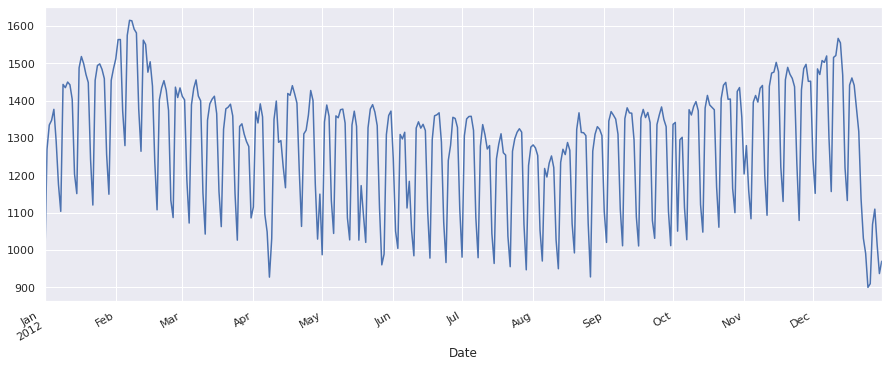

In [64]:
df['Consumption']['2012'].plot(figsize=(15, 6),
                               linestyle='-',
                               subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f2b617da0>],
      dtype=object)

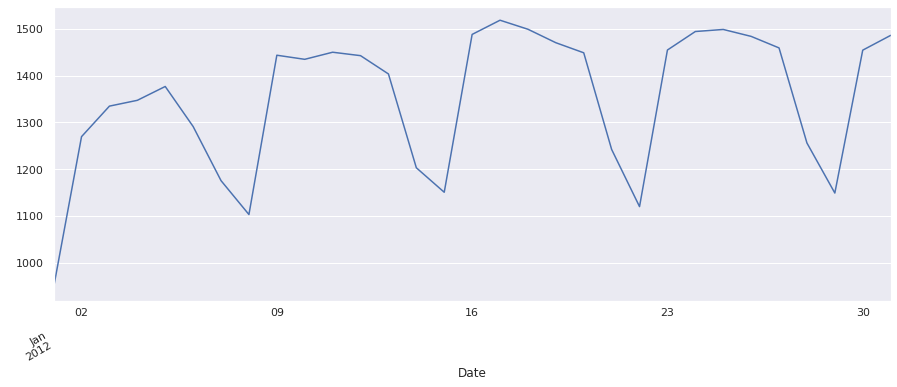

In [65]:
df['Consumption']['2012-01'].plot(figsize=(15, 6),
                                  linestyle='-',
                                  subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f2b5b5be0>],
      dtype=object)

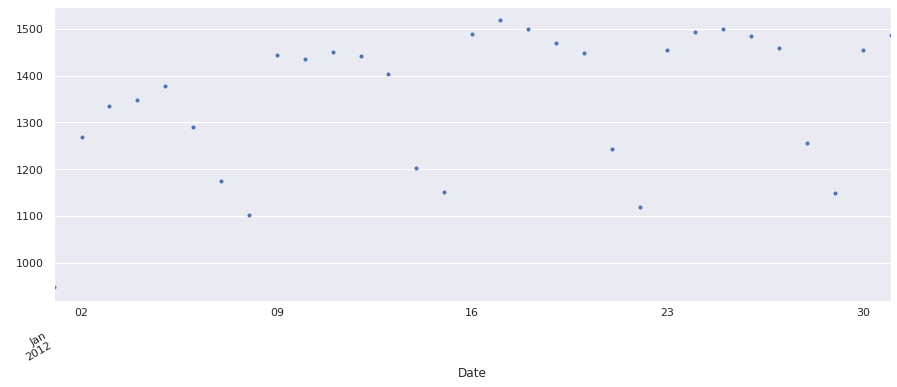

In [66]:
df['Consumption']['2012-01'].plot(figsize=(15, 6),
                                  marker='.',
                                  linestyle='',
                                  subplots=True)

1.3
===

In [75]:
df['Weekday'] = df.index.day_name()

df.head()

,Consumption,Wind,Solar,Month,Weekday
Date,,,,,
2006-01-01,1069.184,NaN,NaN,January,Sunday
2006-01-02,1380.521,NaN,NaN,January,Monday
2006-01-03,1442.533,NaN,NaN,January,Tuesday
2006-01-04,1457.217,NaN,NaN,January,Wednesday
2006-01-05,1477.131,NaN,NaN,January,Thursday


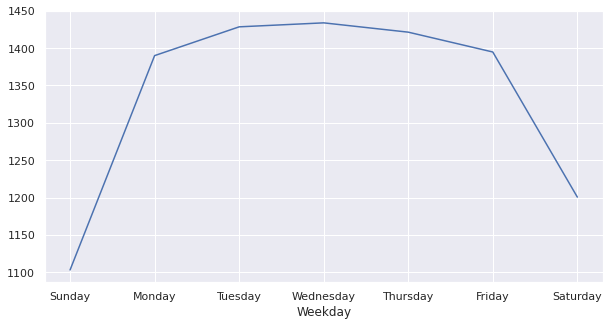

In [76]:
df.groupby('Weekday', sort=False)['Consumption'].mean().plot(figsize=(10,5))

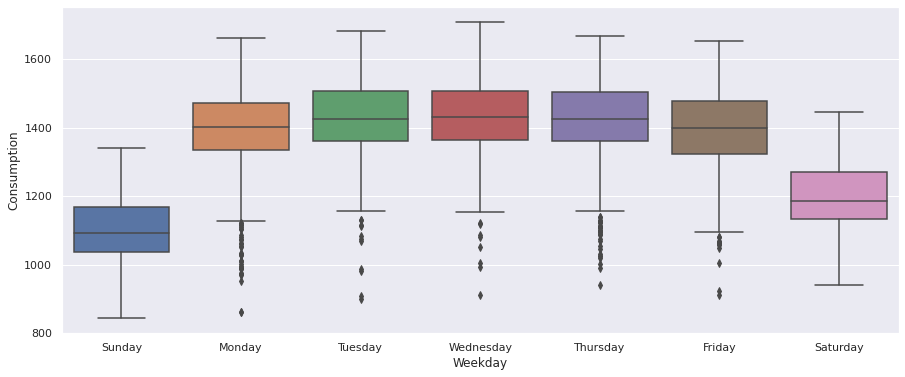

In [77]:
plt.figure(figsize=(15, 6))
sns.boxplot('Weekday', 'Consumption', data=df)

1.4
===

In [84]:
df = pd.read_csv('../data/OPSD_Germany_all.csv',
                 parse_dates=True,
                 index_col='Date')

df['Renewable'] = df['Solar'] + df['Wind']

df.head()

,Consumption,Wind,Solar,Renewable
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


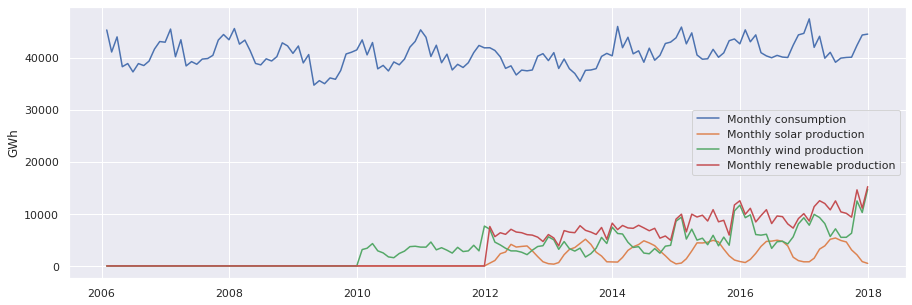

In [85]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(df['Consumption'].resample('M').sum(), label='Monthly consumption')
ax.plot(df['Solar'].resample('M').sum(), label='Monthly solar production')
ax.plot(df['Wind'].resample('M').sum(), label='Monthly wind production')
ax.plot(df['Renewable'].resample('M').sum(), label='Monthly renewable production')
ax.set_ylabel('GWh')
ax.legend()

In [86]:
df_yearly_sum = df.resample('Y').sum()

df_yearly_sum.head()

,Consumption,Wind,Solar,Renewable
Date,,,,
2006-12-31,489068.536,0.000,0.0,0.0
2007-12-31,496631.847,0.000,0.0,0.0
2008-12-31,495570.876,0.000,0.0,0.0
2009-12-31,459737.428,0.000,0.0,0.0
2010-12-31,488588.700,35911.777,0.0,0.0


In [87]:
df_yearly_sum['Renewable/Consumption'] = df_yearly_sum['Renewable'] / df_yearly_sum['Consumption']
df_yearly_sum['Renewable/Consumption'] = (df_yearly_sum['Renewable/Consumption']*100).round(1)

df_yearly_sum.head(20)

,Consumption,Wind,Solar,Renewable,Renewable/Consumption
Date,,,,,
2006-12-31,489068.53600,0.000,0.000,0.000,0.0
2007-12-31,496631.84700,0.000,0.000,0.000,0.0
2008-12-31,495570.87600,0.000,0.000,0.000,0.0
2009-12-31,459737.42800,0.000,0.000,0.000,0.0
2010-12-31,488588.70000,35911.777,0.000,0.000,0.0
2011-12-31,484814.08600,44032.951,0.000,0.000,0.0
2012-12-31,469574.75400,45862.667,27887.332,73749.999,15.7
2013-12-31,463336.85300,47197.832,29559.780,76697.443,16.6
2014-12-31,504164.82100,51107.672,32498.307,83370.502,16.5


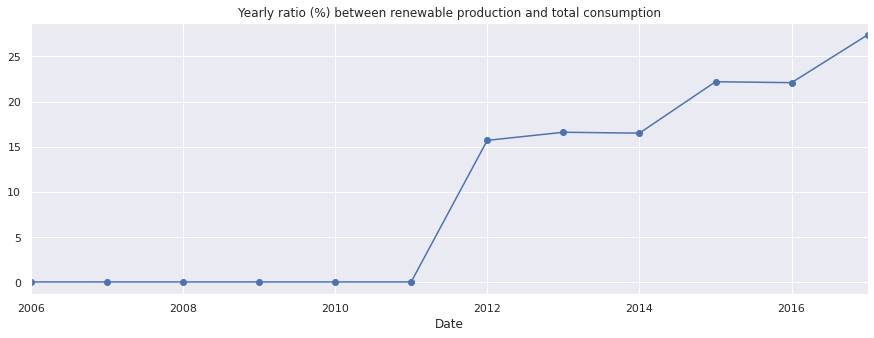

In [88]:
df_yearly_sum['Renewable/Consumption'].plot(figsize=(15, 5),
                                            marker='o',
                                            title='Yearly ratio (%) between renewable production and total consumption')

---

<script>
  $(document).ready(function(){
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('div.prompt').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created with Jupyter, delivered by Fastly, rendered by OVHCloud.
</footer>